In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
X , y = make_classification(n_samples=100,n_classes=2,class_sep=20,n_features=2,n_redundant=0,n_clusters_per_class=1,n_informative=1,random_state=9,hypercube=False)

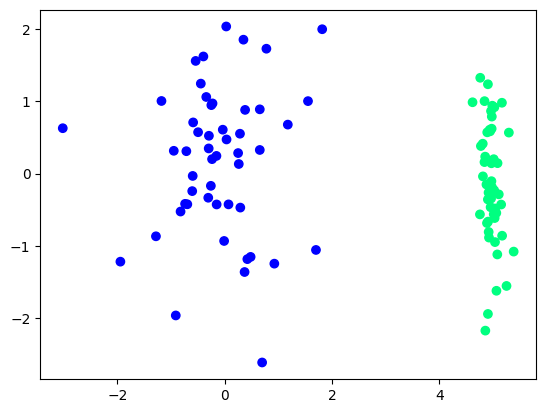

In [3]:
plt.scatter(X[:,0],X[:,1],cmap = 'winter',c=y)
plt.show()

In [4]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(X,y)

C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\arups\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [5]:
print(lor.intercept_)
print(lor.coef_)

[-7.90602488]
[[ 2.95380501 -0.31063768]]


In [6]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [7]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [9]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    epoch = 5000
    
    for i in range(epoch):
        
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr * (np.dot((y - y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

In [10]:
coef_ ,intercept_= gd(X,y)


In [11]:
m1 = -(coef_[0]/coef_[1])
b1 = -(intercept_/coef_[1])

In [12]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input1 + b1
        

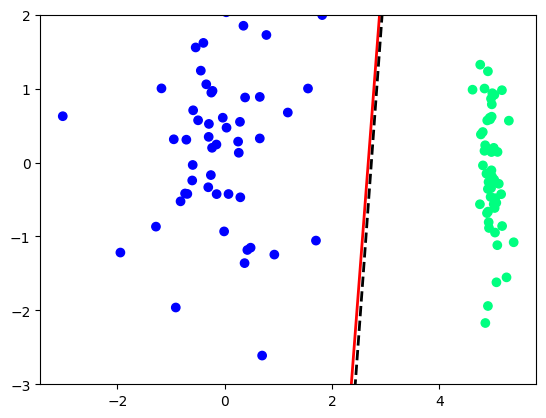

In [13]:
fig,ax = plt.subplots(1,1)
ax.scatter(X[:,0],X[:,1],c=y , cmap = 'winter')
line, = ax.plot(x_input,y_input,color = 'red',linewidth=2)
line2, = ax.plot(x_input1,y_input1,linestyle='dashed',color = 'black',linewidth=2)
plt.ylim(-3,2)
plt.show()